In [1]:
import xarray as xr
import numpy as np
import numpy as np
import xarray as xr
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [50]:
# Define the directory and models
models = ["ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2","HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"]  # Replace with actual model names
diri = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/"

# Initialize vmin and vmax
vmin_nt = float("inf")
vmax_nt = float("-inf")

# Dictionary to store relative differences for each model
relative_differences_nt = {}
all_relative_differences_nt = []

# Loop through each model
for model in models:
    # Define paths for BOC and EOC
    path_BOC_nt = os.path.join(diri, model+"_1x1grid/historical/")
    print(path_BOC_nt)
    path_EOC_nt = os.path.join(diri, model+"_1x1grid/ssp585/")
    
    # Load BOC files
    files_BOC_nt = [f"{path_BOC_nt}aggregated_solar_power_{year}.nc" for year in range(1980, 2015)]
    datasets_BOC_nt = []
    for year, file in zip(range(1980, 2015), files_BOC_nt):
        ds_BOC_nt = xr.open_dataset(file, engine="netcdf4")
        ds_BOC_nt = ds_BOC_nt.expand_dims(time=[year])
        datasets_BOC_nt.append(ds_BOC_nt)
    combined_ds_BOC_nt = xr.concat(datasets_BOC_nt, dim="time")
    mean_power_BOC_nt = combined_ds_BOC_nt["specific generation"].mean(dim="time")
    
    # Load EOC files
    files_EOC_nt = [f"{path_EOC_nt}aggregated_solar_power_{year}.nc" for year in range(2065, 2100)]
    datasets_EOC_nt = []
    for year, file in zip(range(2065, 2100), files_EOC_nt):
        ds_EOC_nt = xr.open_dataset(file)
        ds_EOC_nt = ds_EOC_nt.expand_dims(time=[year])
        datasets_EOC_nt.append(ds_EOC_nt)
    combined_ds_EOC_nt = xr.concat(datasets_EOC_nt, dim="time")
    mean_power_EOC_nt = combined_ds_EOC_nt["specific generation"].mean(dim="time")
    
    # Calculate relative difference
    relative_difference_nt = (mean_power_EOC_nt - mean_power_BOC_nt) / mean_power_BOC_nt * 100
    relative_difference_nt = relative_difference_nt.sel(x=slice(-12, 35), y=slice(33, 65))
    relative_differences_nt[model] = relative_difference_nt
    # Collect all relative differences for global quantile calculation
    all_relative_differences_nt.append(relative_difference_nt)
    
    # Update vmin and vmax
    vmin_nt = min(vmin_nt, relative_difference_nt.min().values)
    vmax_nt = max(vmax_nt, relative_difference_nt.max().values)

# Combine all relative differences into a single array for quantile calculation
all_relative_differences_combined_nt = xr.concat(all_relative_differences_nt, dim="model")
q05_nt, q995_nt = np.nanpercentile(all_relative_differences_combined_nt, [0.5, 99.5])

for model, relative_difference in zip(models, all_relative_differences_nt):
    relative_differences_nt[model] = relative_difference
    
    # Update vmin and vmax
    vmin_nt = min(vmin_nt, relative_difference_nt.min().values)
    vmax_nt = max(vmax_nt, relative_difference_nt.max().values)
    vmin_nt,vmax_nt = q05_nt, q995_nt

/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/ACCESS-CM2_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/CanESM5_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/CMCC-CM2-SR5_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/CMCC-ESM2_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/HadGEM3-GC31-LL_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/HadGEM3-GC31-MM_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/MRI-ESM2-0_1x1grid/historical/


In [43]:
all_relative_differences_combined_nt

<xarray.DataArray 'specific generation' (model: 7, y: 33, x: 48)> Size: 89kB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  3.06098623, ...,  4.14695751,
          4.810093  ,         nan],
        [        nan,         nan,  3.50318503, ...,  5.09570374,
          5.55136427,         nan],
        ...,
        [        nan,         nan,  8.64034878, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  9.77213993, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, -3.75875095, -0.97671708, ...,  4.82611618,
                 nan,         nan],
...
        [15.11144308, 15.35274415, 15.83053722, ...,         nan,
                 nan,         nan],
        [17.45348477, 16.77151063, 13.98205664, ...,         nan,
                 nan,         nan],
        [15.46390781, 14.35159796, 10.00160194, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, -1.54523386, -1.32273643, ...,  4.2716063 ,
          4.43148522,         nan],
        [        nan, -1.41414097, -0.93515   , ...,  4.49479936,
          4.55247818,         nan],
        ...,
        [        nan, -6.10676591, -7.27677573, ...,         nan,
                 nan,         nan],
        [        nan, -3.3327524 , -4.57065103, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * x        (x) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
    lon      (x) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
  * y        (y) float64 264B 33.0 34.0 35.0 36.0 37.0 ... 62.0 63.0 64.0 65.0
    lat      (y) float64 264B 33.0 34.0 35.0 36.0 37.0 ... 62.0 63.0 64.0 65.0
Dimensions without coordinates: model

In [ ]:
# Define the directory and models
models = ["ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2","HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"]  # Replace with actual model names
diri = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/"

# Initialize vmin and vmax
vmin = float("inf")
vmax = float("-inf")

# Dictionary to store relative differences for each model
relative_differences = {}
all_relative_differences = []

# Loop through each model
for model in models:
    # Define paths for BOC and EOC
    path_BOC = os.path.join(diri, model+"_1x1grid/historical/")
    print(path_BOC)
    path_EOC = os.path.join(diri, model+"_1x1grid/ssp585/")
    
    # Load BOC files
    files_BOC = [f"{path_BOC}aggregated_solar_power_{year}.nc" for year in range(1980, 2015)]
    datasets_BOC = []
    for year, file in zip(range(1980, 2015), files_BOC):
        ds_BOC = xr.open_dataset(file, engine="netcdf4")
        ds_BOC = ds_BOC.expand_dims(time=[year])
        datasets_BOC.append(ds_BOC)
    combined_ds_BOC = xr.concat(datasets_BOC, dim="time")
    mean_power_BOC = combined_ds_BOC["specific generation"].mean(dim="time")
    
    # Load EOC files
    files_EOC = [f"{path_EOC}aggregated_solar_power_{year}.nc" for year in range(2065, 2100)]
    datasets_EOC = []
    for year, file in zip(range(2065, 2100), files_EOC):
        ds_EOC = xr.open_dataset(file)
        ds_EOC = ds_EOC.expand_dims(time=[year])
        datasets_EOC.append(ds_EOC)
    combined_ds_EOC = xr.concat(datasets_EOC, dim="time")
    mean_power_EOC = combined_ds_EOC["specific generation"].mean(dim="time")
    
    # Calculate relative difference
    relative_difference = (mean_power_EOC - mean_power_BOC) / mean_power_BOC * 100
    relative_difference = relative_difference.sel(x=slice(-12, 35), y=slice(33, 65))
    relative_differences[model] = relative_difference
    # Collect all relative differences for global quantile calculation
    all_relative_differences.append(relative_difference)
    
    # Update vmin and vmax
    vmin = min(vmin, relative_difference.min().values)
    vmax = max(vmax, relative_difference.max().values)

# Combine all relative differences into a single array for quantile calculation
all_relative_differences_combined = xr.concat(all_relative_differences, dim="model")
q05, q995 = np.nanpercentile(all_relative_differences_combined, [0.5, 99.5])

for model, relative_difference in zip(models, all_relative_differences):
    relative_difference = relative_difference
    relative_differences[model] = relative_difference
    
    # Update vmin and vmax
    vmin = min(vmin, relative_difference.min().values)
    vmax = max(vmax, relative_difference.max().values)
    vmin,vmax = q05, q995

/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/ACCESS-CM2_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/CanESM5_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/CMCC-CM2-SR5_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/CMCC-ESM2_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/HadGEM3-GC31-LL_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/HadGEM3-GC31-MM_1x1grid/historical/
/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/MRI-ESM2-0_1x1grid/historical/


In [69]:
all_relative_differences_combined

<xarray.DataArray 'specific generation' (model: 7, y: 33, x: 48)> Size: 89kB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  1.85311007, ...,  2.44561816,
          3.50207451,         nan],
        [        nan,         nan,  2.22712922, ...,  3.1382761 ,
          4.08002615,         nan],
        ...,
        [        nan,         nan,  6.84738358, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  8.2023642 , ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, -4.76466689, -2.75788282, ...,  2.28041072,
                 nan,         nan],
...
        [13.23851972, 13.46763095, 13.90353974, ...,         nan,
                 nan,         nan],
        [15.36081324, 14.65129156, 11.73878622, ...,         nan,
                 nan,         nan],
        [13.69837771, 12.56023737,  8.12269356, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, -2.03781332, -1.82231072, ...,  2.80699925,
          3.08629081,         nan],
        [        nan, -1.94311513, -1.52629993, ...,  2.86858634,
          3.03237914,         nan],
        ...,
        [        nan, -6.410654  , -7.53935957, ...,         nan,
                 nan,         nan],
        [        nan, -3.69572544, -4.8368582 , ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * x        (x) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
    lon      (x) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
  * y        (y) float64 264B 33.0 34.0 35.0 36.0 37.0 ... 62.0 63.0 64.0 65.0
    lat      (y) float64 264B 33.0 34.0 35.0 36.0 37.0 ... 62.0 63.0 64.0 65.0
Dimensions without coordinates: model

In [ ]:

vmin_t=min(vmin, vmin_nt)
vmax_t=max(vmax, vmax_nt)

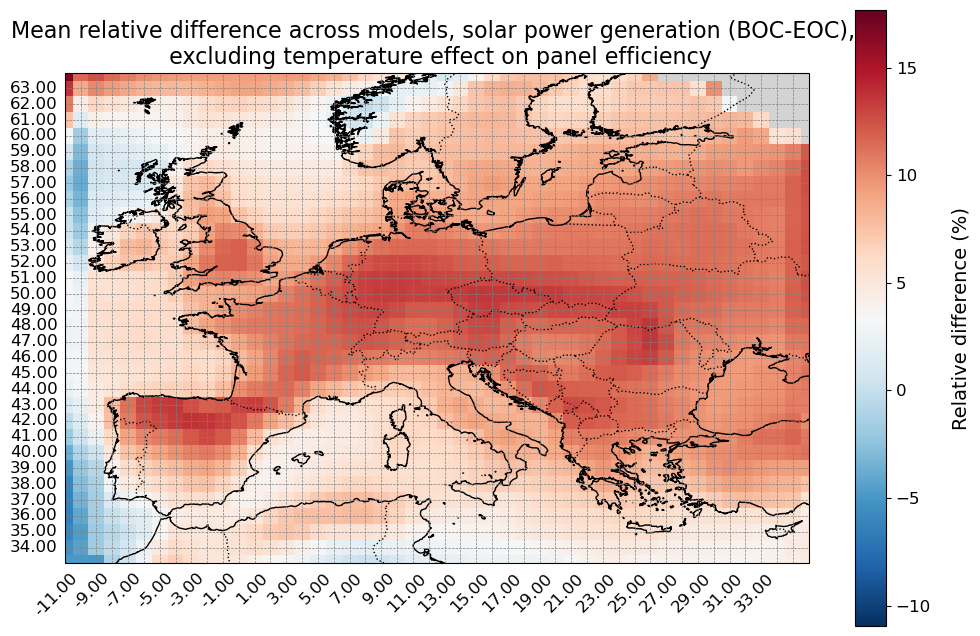

In [4]:
# 1) Compute the multi‐model mean
mean_rel_diff_nt = all_relative_differences_combined_nt.mean(dim="model")

# 2) Plot it with the same color‐limits you set before
from plots import map_plots

vmin_t=min(vmin, vmin_nt)
vmax_t=max(vmax, vmax_nt)

map_plots(
    mean_rel_diff_nt,setnan=False,
    cmap='RdBu_r',
    vmin=vmin_t,             # your 0.5th percentile
    vmax=vmax_t,             # your 99.5th percentile
    title="Mean relative difference across models, solar power generation (BOC-EOC), \n excluding temperature effect on panel efficiency",
    label="Relative difference (%)"
)

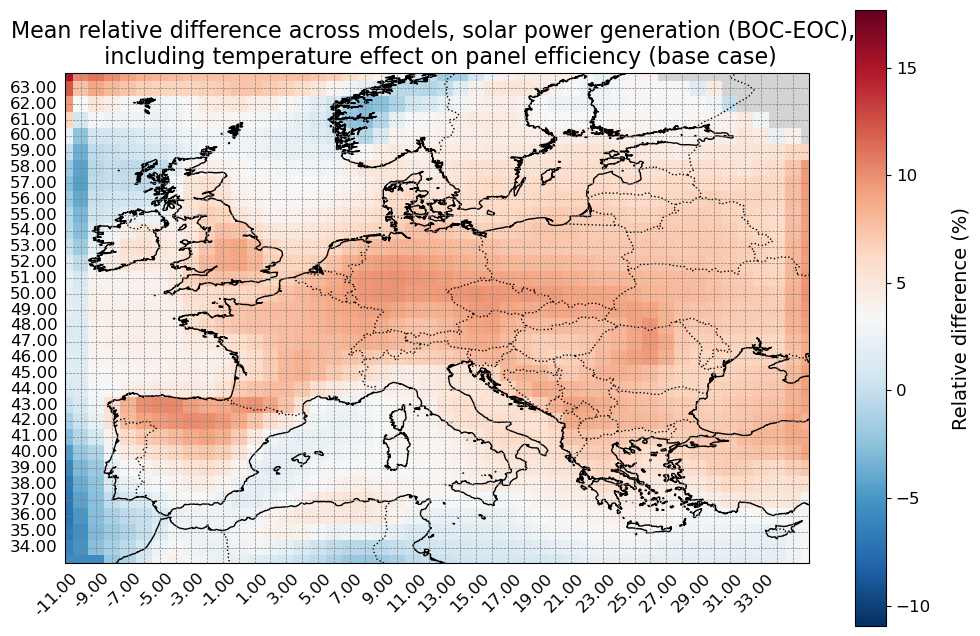

In [5]:
# 1) Compute the multi‐model mean
mean_rel_diff = all_relative_differences_combined.mean(dim="model")

# 2) Plot it with the same color‐limits you set before
from plots import map_plots


map_plots(
    mean_rel_diff,setnan=False,
    cmap='RdBu_r',
    vmin=vmin_t,             # your 0.5th percentile
    vmax=vmax_t,             # your 99.5th percentile
    title="Mean relative difference across models, solar power generation (BOC-EOC), \n including temperature effect on panel efficiency (base case)",
    label="Relative difference (%)"
)


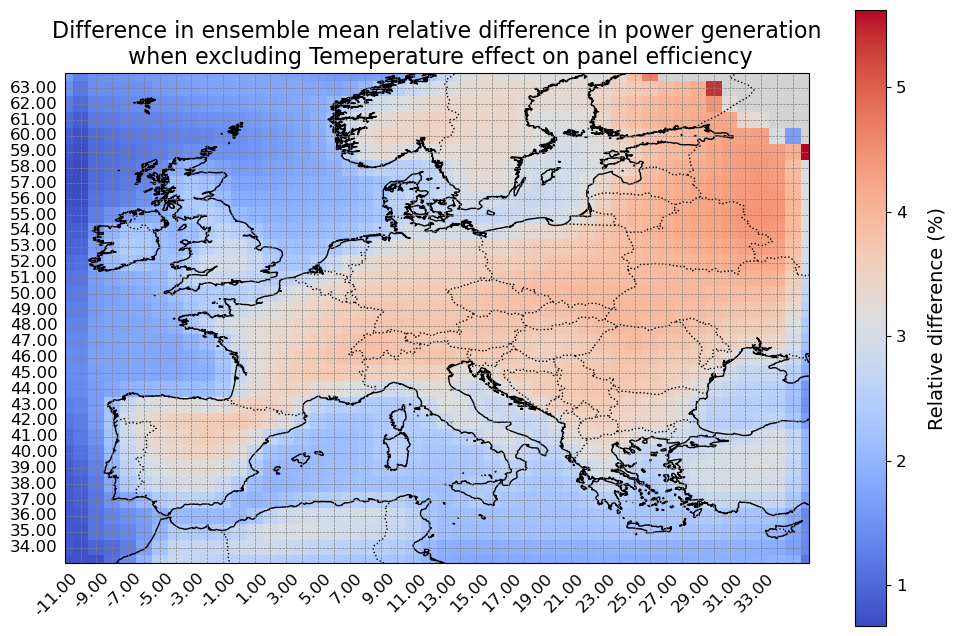

In [12]:
diff_temp=mean_rel_diff_nt-mean_rel_diff
map_plots(
    diff_temp,setnan=False,
    cmap='coolwarm',
    vmin=None,             # your 0.5th percentile
    vmax=None,             # your 99.5th percentile
    title="Difference in ensemble mean relative difference in power generation\n when excluding Temeperature effect on panel efficiency",
    label="Relative difference (%)"
)

In [9]:
diff_temp.median()

<xarray.DataArray 'specific generation' ()> Size: 8B
array(2.74522714)

In [70]:
combined_ds_BOC
combined_ds_EOC
combined_ds_BOC_nt
combined_ds_EOC_nt

<xarray.Dataset> Size: 539kB
Dimensions:              (time: 35, y: 40, x: 48)
Coordinates:
  * time                 (time) int64 280B 2065 2066 2067 ... 2097 2098 2099
  * x                    (x) float64 384B -12.0 -11.0 -10.0 ... 33.0 34.0 35.0
    lon                  (x) float64 384B -12.0 -11.0 -10.0 ... 33.0 34.0 35.0
  * y                    (y) float64 320B 33.0 34.0 35.0 36.0 ... 70.0 71.0 72.0
    lat                  (y) float64 320B 33.0 34.0 35.0 36.0 ... 70.0 71.0 72.0
Data variables:
    specific generation  (time, y, x) float64 538kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    regrid_method:  bilinear

In [71]:
rel_nt=combined_ds_EOC_nt['specific generation']-combined_ds_BOC_nt['specific generation']
rel_t=combined_ds_EOC['specific generation']-combined_ds_BOC['specific generation']

In [72]:
rel_nt

<xarray.DataArray 'specific generation' (time: 0, y: 40, x: 48)> Size: 0B
array([], shape=(0, 40, 48), dtype=float64)
Coordinates:
  * time     (time) int64 0B 
  * x        (x) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
  * y        (y) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0
    lon      (x) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
    lat      (y) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0

In [52]:
rel_nt=all_relative_differences_combined_nt
rel_t=all_relative_differences_combined

In [53]:
import xarray as xr
import numpy as np
import scipy.stats as stats

# 1) Build the per‐model difference map (no-temp minus with-temp)
#    diff: DataArray of shape (model=7, y, x)
diff = rel_nt - rel_t 

# 2) Compute area (spatial) mean for each model
#    You may want to weight by grid‐cell area if lat spacing varies,
#    but for a uniform 1°×1° grid a straight mean is fine:
pan_eu_diff = diff.mean(dim=["y","x"])   # dims: model

# 3) Summarize
mean_diff = pan_eu_diff.mean().item()
std_diff  = pan_eu_diff.std(ddof=1).item()
n_models  = pan_eu_diff.sizes["model"]

# 4) One‐sample t-test vs. zero
t_stat, p_val = stats.ttest_1samp(pan_eu_diff.values, popmean=0.0, nan_policy="omit")

# 5) Compute 95% confidence interval on the mean
alpha = 0.05
df    = n_models - 1
se    = std_diff / np.sqrt(n_models)
tcrit = stats.t.ppf(1 - alpha/2, df)
ci_low, ci_high = mean_diff - tcrit*se, mean_diff + tcrit*se

# 6) Print results
print(f"Pan-EU ΔRelDiff (no-temp – with-temp): {mean_diff:.2f}%")
print(f"  95% CI: [{ci_low:.2f}, {ci_high:.2f}]%")
print(f"  t({df}) = {t_stat:.2f},  p = {p_val:.3f}")

if p_val < alpha:
    print("→ Mean difference is statistically significant (p < 0.05).")
else:
    print("→ Mean difference is NOT statistically significant (p ≥ 0.05).")

Pan-EU ΔRelDiff (no-temp – with-temp): 2.80%
  95% CI: [2.01, 3.59]%
  t(6) = 8.68,  p = 0.000
→ Mean difference is statistically significant (p < 0.05).


In [54]:
#seasonal_analysis starts here
import os
import xarray as xr

# Define the directory and models
models = ["ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2", "HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"]
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/"
all_rel_diff= []

# 1) Load seasonal means and compute Δ% per model, then convert to DataArray
for model in models:
    boc_files= [
        os.path.join(base_dir, f"{model}_1x1grid/historical/aggregated_solar_power_seasons_{yr}.nc")
        for yr in range(1980, 2015)
    ]
    eoc_files= [
        os.path.join(base_dir, f"{model}_1x1grid/ssp585/aggregated_solar_power_seasons_{yr}.nc")
        for yr in range(2065, 2100)
    ]

    ds_boc = xr.concat(
        [xr.open_dataset(f).expand_dims(time=[yr]) for yr, f in zip(range(1980, 2015), boc_files)],
        dim="time"
    )
    ds_eoc= xr.concat(
        [xr.open_dataset(f).expand_dims(time=[yr]) for yr, f in zip(range(2065, 2100), eoc_files)],
        dim="time"
    )

    # Compute the relative-difference Dataset using medians
    ds_rel= (
        ds_eoc.median("time")
        - ds_boc.median("time")
    ) / ds_boc.median("time") * 100
    ds_rel = ds_rel.sel(x=slice(-12, 35), y=slice(33, 65))

    # Convert to a single DataArray with a "season" dimension and append to the list
    all_rel_diff.append(ds_rel.to_array(dim="season"))

# 2) Combine all models into a single DataArray and compute the ensemble mean
ensemble_rel_diff_seasons = xr.concat(all_rel_diff, dim="model").mean(dim="model")

# The result is the ensemble mean relative difference per season
print(ensemble_rel_diff_seasons)

<xarray.DataArray (season: 4, y: 33, x: 48)> Size: 51kB
array([[[  1.7440781 ,   2.15623727,   0.95422485, ...,  10.40808002,
          10.53221571,  15.16104792],
        [  1.38591651,   1.48237643,   3.67685882, ...,  10.5074461 ,
          13.11354947,  14.11444581],
        [  0.95417525,   2.53409771,   5.23422301, ...,  14.03524583,
          15.22928841,  12.52822868],
        ...,
        [ 57.8372983 ,  42.97678983,  55.15079441, ...,          nan,
                  nan,          nan],
        [ 54.65289775,  40.4333501 ,  62.11313966, ...,          nan,
                  nan,          nan],
        [ 49.70378674,  47.83629299,  49.27227944, ...,          nan,
                  nan,          nan]],

       [[ -2.54445816,  -2.61648938,  -2.88656473, ...,   0.69536153,
           1.01759375,   3.82755196],
        [ -2.39670752,  -2.23266854,  -0.43043503, ...,   2.00521564,
           2.56734764,   2.49209996],
        [ -2.32890424,  -2.11702344,  -0.5835448 , ...,   2.51647

In [55]:
import os
import xarray as xr

# Define the directory and models
models = ["ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2", "HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"]
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp/"
all_rel_diff_nt = []

# 1) Load seasonal means and compute Δ% per model, then convert to DataArray
for model in models:
    boc_files_nt = [
        os.path.join(base_dir, f"{model}_1x1grid/historical/aggregated_solar_power_seasons_{yr}.nc")
        for yr in range(1980, 2015)
    ]
    eoc_files_nt = [
        os.path.join(base_dir, f"{model}_1x1grid/ssp585/aggregated_solar_power_seasons_{yr}.nc")
        for yr in range(2065, 2100)
    ]

    ds_boc_nt = xr.concat(
        [xr.open_dataset(f).expand_dims(time=[yr]) for yr, f in zip(range(1980, 2015), boc_files_nt)],
        dim="time"
    )
    ds_eoc_nt = xr.concat(
        [xr.open_dataset(f).expand_dims(time=[yr]) for yr, f in zip(range(2065, 2100), eoc_files_nt)],
        dim="time"
    )

    # Compute the relative-difference Dataset using medians
    ds_rel_nt = (
        ds_eoc_nt.median("time")
        - ds_boc_nt.median("time")
    ) / ds_boc_nt.median("time") * 100
    ds_rel_nt = ds_rel_nt.sel(x=slice(-12, 35), y=slice(33, 65))

    # Convert to a single DataArray with a "season" dimension and append to the list
    all_rel_diff_nt.append(ds_rel_nt.to_array(dim="season"))

# 2) Combine all models into a single DataArray and compute the ensemble mean
ensemble_rel_diff_nt_seasons = xr.concat(all_rel_diff_nt, dim="model").mean(dim="model")

# The result is the ensemble mean relative difference per season
print(ensemble_rel_diff_nt_seasons)

<xarray.DataArray (season: 4, y: 33, x: 48)> Size: 51kB
array([[[  3.08825788,   3.35745571,   2.10608643, ...,  12.95638533,
          12.64351408,  16.83966889],
        [  3.1422151 ,   2.81031047,   4.81748918, ...,  12.88623383,
          15.00111678,  15.7363484 ],
        [  2.56180265,   3.66597984,   6.40568651, ...,  16.89499334,
          17.5147039 ,  14.50083847],
        ...,
        [ 60.1394202 ,  44.97576373,  58.01227508, ...,          nan,
                  nan,          nan],
        [ 55.75654487,  42.03413   ,  62.83018937, ...,          nan,
                  nan,          nan],
        [ 52.01847794,  49.33313433,  51.4103748 , ...,          nan,
                  nan,          nan]],

       [[ -1.24204228,  -1.54515861,  -1.87013859, ...,   2.55222175,
           2.22971546,   4.8957303 ],
        [ -1.27931696,  -1.40199525,   0.71785992, ...,   3.80927105,
           4.27299703,   3.84615915],
        [ -1.13841243,  -1.13989523,   0.77559043, ...,   4.41329

In [68]:
ensemble_rel_diff_nt_seasons

<xarray.DataArray (season: 4, y: 33, x: 48)> Size: 51kB
array([[[  3.08825788,   3.35745571,   2.10608643, ...,  12.95638533,
          12.64351408,  16.83966889],
        [  3.1422151 ,   2.81031047,   4.81748918, ...,  12.88623383,
          15.00111678,  15.7363484 ],
        [  2.56180265,   3.66597984,   6.40568651, ...,  16.89499334,
          17.5147039 ,  14.50083847],
        ...,
        [ 60.1394202 ,  44.97576373,  58.01227508, ...,          nan,
                  nan,          nan],
        [ 55.75654487,  42.03413   ,  62.83018937, ...,          nan,
                  nan,          nan],
        [ 52.01847794,  49.33313433,  51.4103748 , ...,          nan,
                  nan,          nan]],

       [[ -1.24204228,  -1.54515861,  -1.87013859, ...,   2.55222175,
           2.22971546,   4.8957303 ],
        [ -1.27931696,  -1.40199525,   0.71785992, ...,   3.80927105,
           4.27299703,   3.84615915],
        [ -1.13841243,  -1.13989523,   0.77559043, ...,   4.41329864,
           4.53801174,   3.1789763 ],
...
        [  3.60539207,   0.94678851,   2.19474722, ...,          nan,
                  nan,          nan],
        [  8.50142372,   5.13519178,   6.45136384, ...,          nan,
                  nan,          nan],
        [  8.90496486,   8.2621277 ,   8.48355227, ...,          nan,
                  nan,          nan]],

       [[ -7.81001045,  -7.42362316,  -7.29268075, ...,   1.75025803,
           1.52557779,   2.20877499],
        [ -7.24770068,  -6.35198203,  -2.18846784, ...,   2.16705423,
           2.47248316,   1.34225011],
        [ -7.23524574,  -4.76562519,  -1.26555206, ...,   3.42214132,
           2.32644773,  -0.28644694],
        ...,
        [ 28.37398872,  20.22842588,  23.33699956, ...,          nan,
                  nan,          nan],
        [ 35.00901315,  25.77703934,  26.84949746, ...,          nan,
                  nan,          nan],
        [ 33.42833844,  33.96269141,  32.9723775 , ...,          nan,
                  nan,          nan]]])
Coordinates:
  * x        (x) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
    lon      (x) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
  * y        (y) float64 264B 33.0 34.0 35.0 36.0 37.0 ... 62.0 63.0 64.0 65.0
    lat      (y) float64 264B 33.0 34.0 35.0 36.0 37.0 ... 62.0 63.0 64.0 65.0
  * season   (season) object 32B 'Winter' 'Spring' 'Summer' 'Autumn'

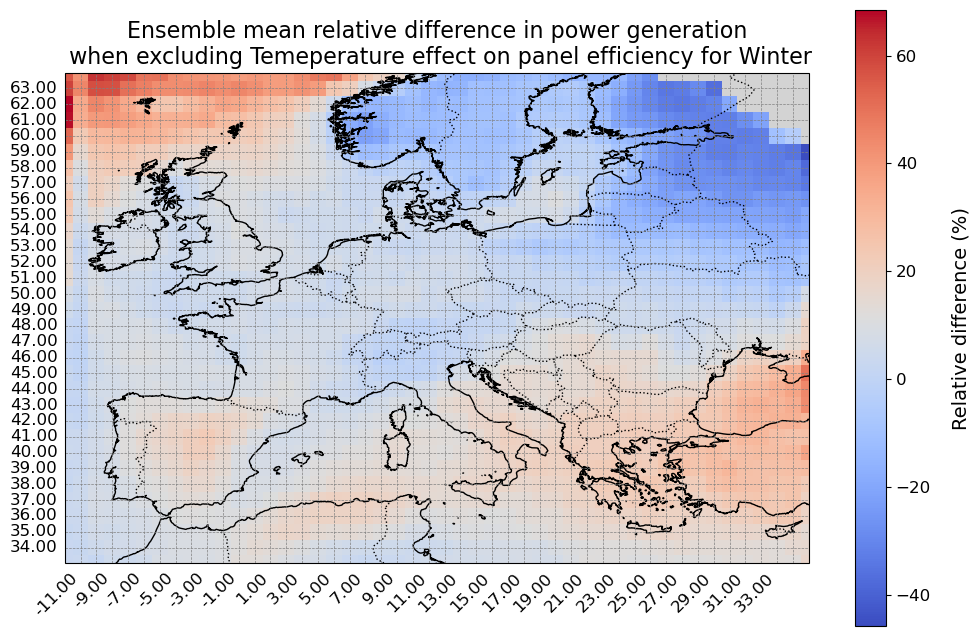

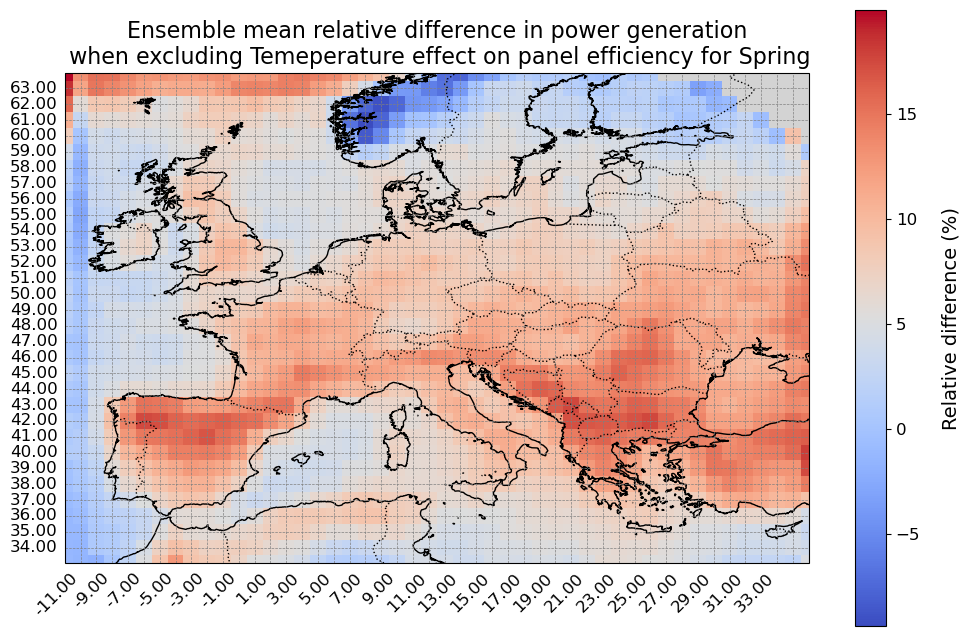

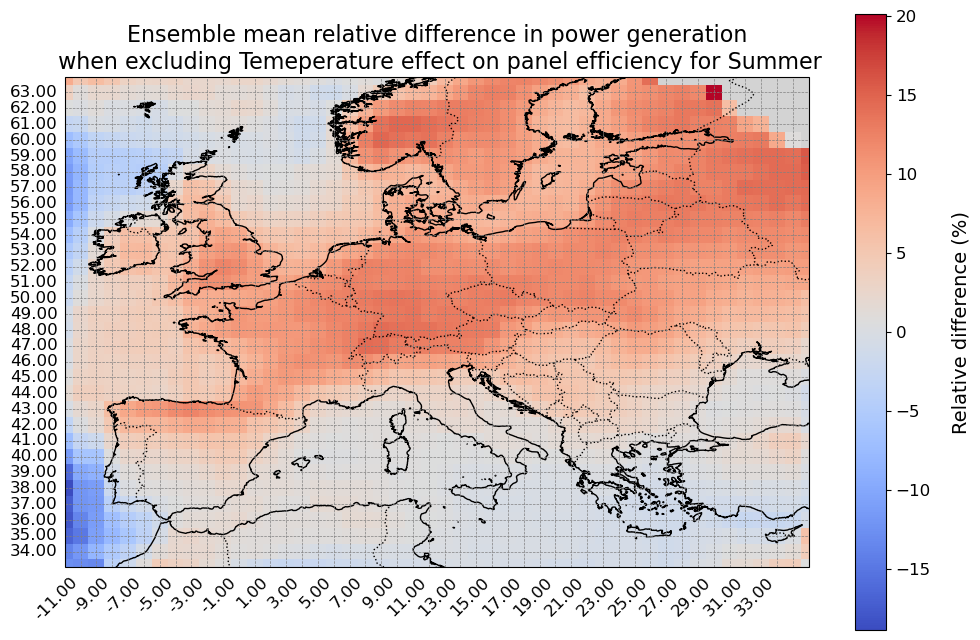

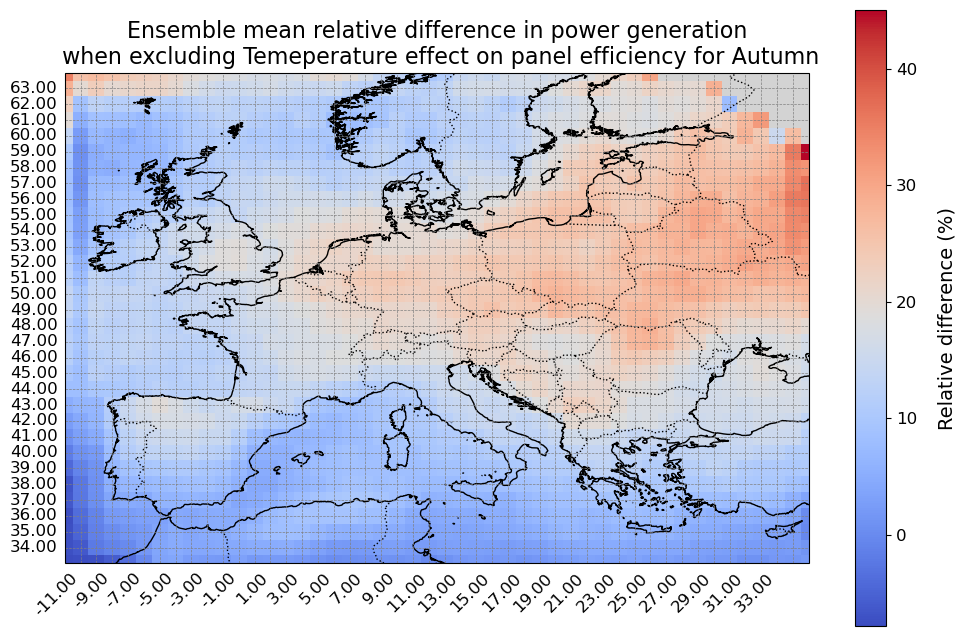

In [56]:
import matplotlib.pyplot as plt

# Define the seasons (assuming they are in the "season" dimension of the DataArray)
seasons = ensemble_rel_diff_nt_seasons["season"].values

# Loop through each season and plot
for season in seasons:
    # Select the data for the current season
    data = ensemble_rel_diff_nt_seasons.sel(season=season)
    
    map_plots(data, setnan=False,
              cmap='coolwarm',
              vmin=None,             # your 0.5th percentile
              vmax=None,             # your 99.5th percentile
              title=f"Ensemble mean relative difference in power generation\n when excluding Temeperature effect on panel efficiency for {season}",
              label="Relative difference (%)"
    )

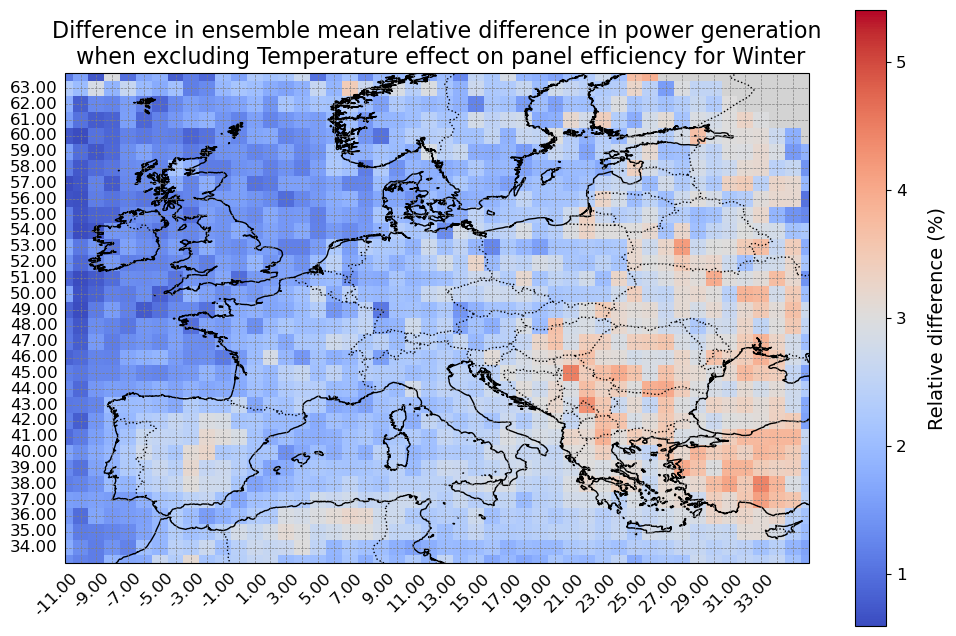

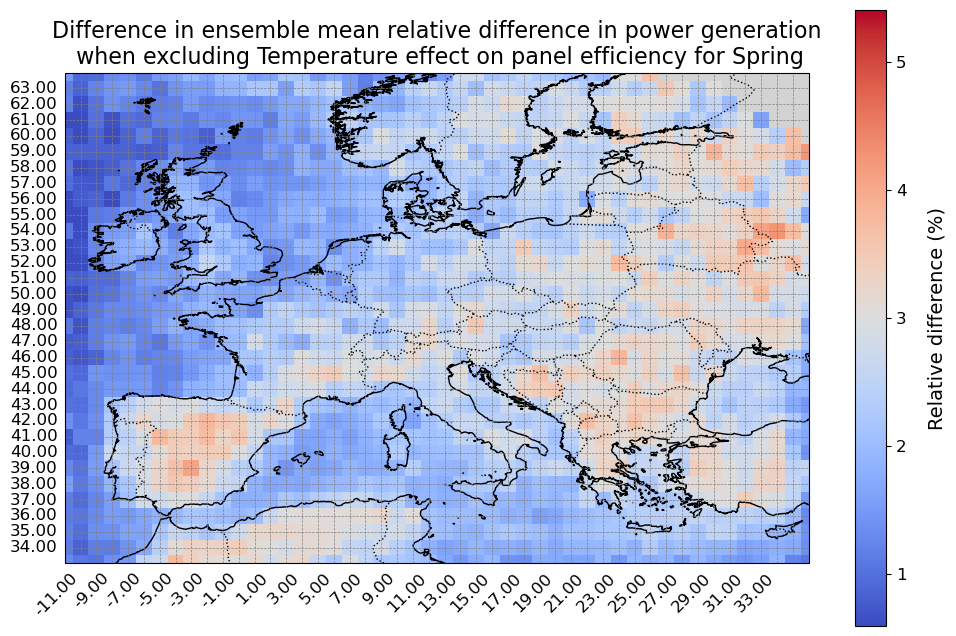

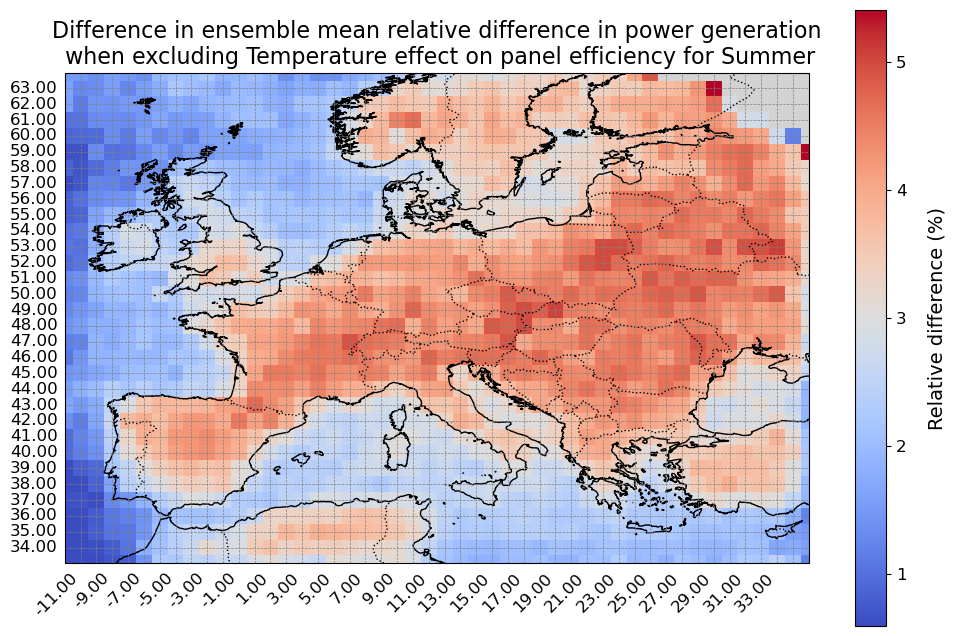

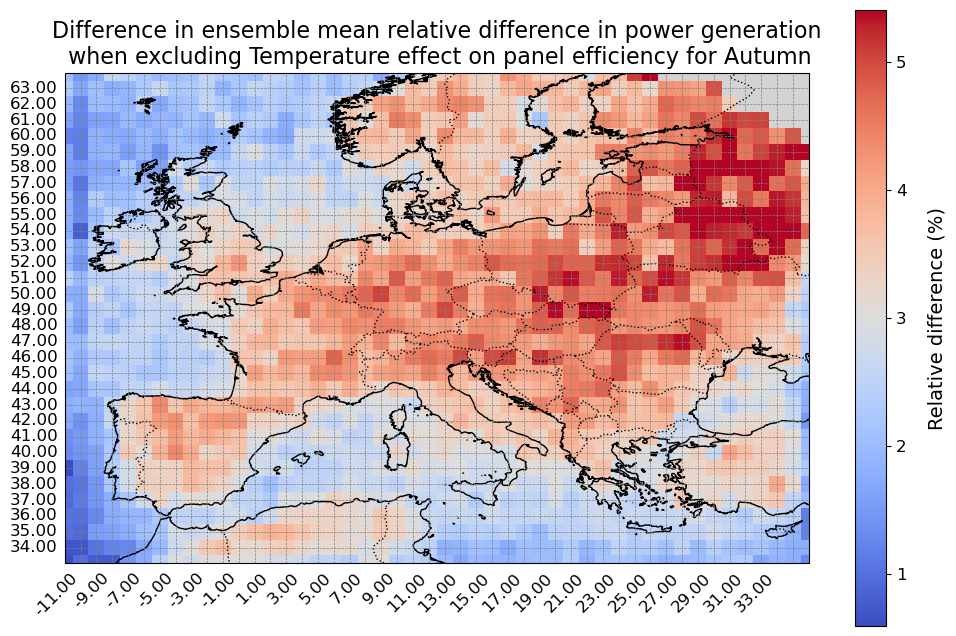

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Define the seasons (assuming they are in the "season" dimension of the DataArray)
seasons = ensemble_rel_diff_nt_seasons["season"].values

# Calculate all differences across seasons
all_differences = xr.concat(
    [ensemble_rel_diff_nt_seasons.sel(season=season) - ensemble_rel_diff_seasons.sel(season=season) for season in seasons],
    dim="season"
)

# Calculate the 0.5th and 99.5th percentiles
q05 = np.nanpercentile(all_differences, 0.5)
q995 = np.nanpercentile(all_differences, 99.5)

# Loop through each season and plot
for season in seasons:
    # Select the data for the current season
    data = ensemble_rel_diff_nt_seasons.sel(season=season) - ensemble_rel_diff_seasons.sel(season=season)
    
    map_plots(data, setnan=False,
              cmap='coolwarm',
              vmin=q05,  # Use the 0.5th percentile
              vmax=q995,  # Use the 99.5th percentile
              title=f"Difference in ensemble mean relative difference in power generation\n when excluding Temperature effect on panel efficiency for {season}",
              label="Relative difference (%)"
    )

In [58]:
median_differences = {}
for season in seasons:
    # Select the data for the current season
    data = ensemble_rel_diff_nt_seasons.sel(season=season) - ensemble_rel_diff_seasons.sel(season=season)
    
    # Calculate the median difference for the current season
    median_diff = np.nanmedian(data.values)
    median_differences[season] = median_diff

In [59]:
median_differences

{'Winter': np.float64(2.177676384324014),
 'Spring': np.float64(2.2823577464579614),
 'Summer': np.float64(3.088947001594751),
 'Autumn': np.float64(3.225377458025228)}

In [61]:
rel_nt=ensemble_rel_diff_nt_seasons
rel_t=ensemble_rel_diff_seasons

In [67]:
import xarray as xr
import numpy as np
import scipy.stats as stats

# 1) Build the per‐model difference map (no-temp minus with-temp)
#    diff: DataArray of shape (model=7, season=4, y, x)
diff = rel_nt - rel_t

# Initialize results dictionary
seasonal_results = {}

# Loop through each season
for season in diff["season"].values:
    # Select the difference for the current season
    diff_season = diff.sel(season=season)
    
    # 2) Compute area (spatial) mean for each model
    pan_eu_diff_season = diff_season.mean(dim=["y", "x"])  # dims: model

    # 3) Summarize
    mean_diff = pan_eu_diff_season.mean().item()
    std_diff = pan_eu_diff_season.std(ddof=1).item()
    n_models = 7
    #pan_eu_diff_season.sizes["model"]
    # 4) One‐sample t-test vs. zero
    t_stat, p_val = stats.ttest_1samp(pan_eu_diff_season.values, popmean=0.0, nan_policy="omit")

    # 5) Compute 95% confidence interval on the mean
    alpha = 0.05
    df = n_models - 1
    se = std_diff / np.sqrt(n_models)
    tcrit = stats.t.ppf(1 - alpha / 2, df)
    ci_low, ci_high = mean_diff - tcrit * se, mean_diff + tcrit * se

    # Store results for the current season
    seasonal_results[season] = {
        "mean_diff": mean_diff,
        "ci_low": ci_low,
        "ci_high": ci_high,
        "t_stat": t_stat,
        "p_val": p_val,
        "significant": p_val < alpha
    }

    # Print results for the current season
    print(f"Season: {season}")
    print(f"  Pan-EU ΔRelDiff (no-temp – with-temp): {mean_diff:.2f}%")
    print(f"  95% CI: [{ci_low:.2f}, {ci_high:.2f}]%")
    print(f"  t({df}) = {t_stat:.2f},  p = {p_val:.3f}")
    if p_val < alpha:
        print("  → Mean difference is statistically significant (p < 0.05).")
    else:
        print("  → Mean difference is NOT statistically significant (p ≥ 0.05).")
    print()

# The `seasonal_results` dictionary now contains the results for all seasons

Season: Winter
  Pan-EU ΔRelDiff (no-temp – with-temp): 2.20%
  95% CI: [nan, nan]%
  t(6) = nan,  p = nan
  → Mean difference is NOT statistically significant (p ≥ 0.05).

Season: Spring
  Pan-EU ΔRelDiff (no-temp – with-temp): 2.26%
  95% CI: [nan, nan]%
  t(6) = nan,  p = nan
  → Mean difference is NOT statistically significant (p ≥ 0.05).

Season: Summer
  Pan-EU ΔRelDiff (no-temp – with-temp): 3.06%
  95% CI: [nan, nan]%
  t(6) = nan,  p = nan
  → Mean difference is NOT statistically significant (p ≥ 0.05).

Season: Autumn
  Pan-EU ΔRelDiff (no-temp – with-temp): 3.25%
  95% CI: [nan, nan]%
  t(6) = nan,  p = nan
  → Mean difference is NOT statistically significant (p ≥ 0.05).



/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/scipy/stats/_stats_py.py:1213: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/scipy/stats/_stats_py.py:1213: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/scipy/stats/_stats_py.py:1213: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/scipy/stats/_stats_py.py:1213: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packa

In [73]:
import os
import glob
import xarray as xr
import numpy as np
import scipy.stats as stats
import pandas as pd

# Models and directories
models    = ["ACCESS-CM2","CanESM5","CMCC-CM2-SR5","CMCC-ESM2",
             "HadGEM3-GC31-LL","HadGEM3-GC31-MM","MRI-ESM2-0"]
root_nt   = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp"
root_t    = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power"
grid      = "ACCESS-CM2_1x1grid"
seasons   = ["Winter","Spring","Summer","Autumn"]

# 1) Load per-model seasonal medians and build rel-diff arrays
all_t  = []
all_nt = []

for model in models:
    # historical & ssp585 seasonal files with-temp
    boc_t = xr.open_mfdataset(
        sorted(glob.glob(f"{root_t}/{model}_1x1grid/historical/aggregated_solar_power_seasons_*.nc")),
        combine="nested", concat_dim="time")
    eoc_t = xr.open_mfdataset(
        sorted(glob.glob(f"{root_t}/{model}_1x1grid/ssp585/aggregated_solar_power_seasons_*.nc")),
        combine="nested", concat_dim="time")
    rel_t = (eoc_t.median("time") - boc_t.median("time")) / boc_t.median("time") * 100
    all_t.append(rel_t.to_array(dim="season"))
    
    # same for no-temp
    boc_nt = xr.open_mfdataset(
        sorted(glob.glob(f"{root_nt}/{model}_1x1grid/historical/aggregated_solar_power_seasons_*.nc")),
        combine="nested", concat_dim="time")
    eoc_nt = xr.open_mfdataset(
        sorted(glob.glob(f"{root_nt}/{model}_1x1grid/ssp585/aggregated_solar_power_seasons_*.nc")),
        combine="nested", concat_dim="time")
    rel_nt = (eoc_nt.median("time") - boc_nt.median("time")) / boc_nt.median("time") * 100
    all_nt.append(rel_nt.to_array(dim="season"))

# 2) Stack into 4-D DataArrays: dims (model, season, y, x)
da_t  = xr.concat(all_t,  dim="model")
da_nt = xr.concat(all_nt, dim="model")

# 3) Compute the per-model, per-season difference
diff = da_nt - da_t  # dims: model, season, y, x

# 4) Collapse spatially to get one number per model & season
pan_eu = diff.mean(dim=["y","x"])  # dims: model, season

# 5) For each season, run t-test across the 7 models
results = []
for s in seasons:
    arr = pan_eu.sel(season=s).values
    mean_diff = np.nanmean(arr)
    std_diff  = np.nanstd(arr, ddof=1)
    n         = len(arr)
    
    # one-sample t-test vs 0
    t_stat, p_val = stats.ttest_1samp(arr, popmean=0.0, nan_policy="omit")
    
    # 95% CI on the mean
    se    = std_diff / np.sqrt(n)
    ci    = stats.t.interval(0.95, df=n-1, loc=mean_diff, scale=se)
    
    results.append({
        "Season": s,
        "Mean Δ% (no-temp–temp)": mean_diff,
        "95% CI lower": ci[0],
        "95% CI upper": ci[1],
        "t-stat": t_stat,
        "p-value": p_val,
        "Significant (p<0.05)": p_val < 0.05
    })

df = pd.DataFrame(results).set_index("Season")
print(df)


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/dask/_task_spec.py:741: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


        Mean Δ% (no-temp–temp)  95% CI lower  95% CI upper     t-stat  \
Season                                                                  
Winter                2.234978      1.840568      2.629388  13.865765   
Spring                2.305524      1.701621      2.909426   9.341595   
Summer                3.173491      2.282540      4.064442   8.715688   
Autumn                3.359543      2.347913      4.371174   8.125996   

         p-value  Significant (p<0.05)  
Season                                  
Winter  0.000009                  True  
Spring  0.000085                  True  
Summer  0.000126                  True  
Autumn  0.000187                  True  


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/dask/_task_spec.py:741: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


In [80]:
ds_BOC

<xarray.Dataset> Size: 17kB
Dimensions:              (time: 1, x: 48, y: 40)
Coordinates:
  * time                 (time) int64 8B 2014
  * x                    (x) float64 384B -12.0 -11.0 -10.0 ... 33.0 34.0 35.0
    lon                  (x) float64 384B ...
  * y                    (y) float64 320B 33.0 34.0 35.0 36.0 ... 70.0 71.0 72.0
    lat                  (y) float64 320B ...
Data variables:
    specific generation  (time, y, x) float64 15kB 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [84]:
import os
import glob
import xarray as xr
import numpy as np
import scipy.stats as stats
import pandas as pd

# 0) Configuration
models   = ["ACCESS-CM2","CanESM5","CMCC-CM2-SR5","CMCC-ESM2",
            "HadGEM3-GC31-LL","HadGEM3-GC31-MM","MRI-ESM2-0"]
root_nt  = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power_notemp"
root_t   = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power"
years_b  = list(range(1980, 2015))
years_e  = list(range(2065, 2100))

# 1) Build per-model lists of yearly rel-diff DataArrays
all_t  = []
all_nt = []

for model in models:
    # — BOC & EOC filenames for with-temp scenario —
    for yr in years_b:
        boc_t_paths = [ os.path.join(root_t, f"{model}_1x1grid/historical/aggregated_solar_power_{yr}.nc")
                        for yr in years_b ]
        # Load and tag each year
    boc_t = xr.concat(
        [xr.open_dataset(fp)["specific generation"]
         for yr,fp in zip(years_b, boc_t_paths)],
        dim="time"
    )
    for year in years_e:
        eoc_t_paths = [ os.path.join(root_t, f"{model}_1x1grid/ssp585/aggregated_solar_power_{yr}.nc")
                        for yr in years_e ]

        
        eoc_t = xr.concat(
            [xr.open_dataset(fp)["specific generation"]
            for yr,fp in zip(years_e, eoc_t_paths)],
            dim="time"
        )

    # compute rel-diff per year
    rel_t = (eoc_t - boc_t) / boc_t * 100
    all_t.append(rel_t)

    # — same for no-temp scenario —
    boc_nt_paths = [ os.path.join(root_nt, f"{model}_1x1grid/historical/aggregated_solar_power_{yr}.nc")
                     for yr in years_b ]
    eoc_nt_paths = [ os.path.join(root_nt, f"{model}_1x1grid/ssp585/aggregated_solar_power_{yr}.nc")
                     for yr in years_e ]

    boc_nt = xr.concat(
        [xr.open_dataset(fp)["specific generation"]
         for yr,fp in zip(years_b, boc_nt_paths)],
        dim="time"
    )
    eoc_nt = xr.concat(
        [xr.open_dataset(fp)["specific generation"]
         for yr,fp in zip(years_e, eoc_nt_paths)],
        dim="time"
    )

    rel_nt = (eoc_nt - boc_nt) / boc_nt * 100
    all_nt.append(rel_nt)

# 2) Stack across models → dims (model, year, y, x)
da_t  = xr.concat(all_t,  dim="model")
da_nt = xr.concat(all_nt, dim="model")

# 3) Compute the per-model, per-year difference
diff = da_nt - da_t  # dims: model, year, y, x

# 4) Collapse spatially → DataArray dims (model, year)
pan_eu = diff.mean(dim=["y","x"])

# 5) Run t-test across the 7 models for each year
results = []
for yr in pan_eu.time.values:
    arr       = pan_eu.sel(time=yr).values
    mean_diff = np.nanmean(arr)
    std_diff  = np.nanstd(arr, ddof=1)
    n         = len(arr)

    t_stat, p_val = stats.ttest_1samp(arr, popmean=0.0, nan_policy="omit")
    se            = std_diff / np.sqrt(n)
    ci_lo, ci_hi  = stats.t.interval(0.95, df=n-1, loc=mean_diff, scale=se)

    results.append({
        "Year": yr,
        "Mean Δ%": mean_diff,
        "95% CI low": ci_lo,
        "95% CI high": ci_hi,
        "t-stat": t_stat,
        "p-value": p_val,
        "Signif (p<0.05)": (p_val < 0.05)
    })

df_yearly = pd.DataFrame(results).set_index("Year")
print(df_yearly)


       Mean Δ%  95% CI low  95% CI high     t-stat   p-value  Signif (p<0.05)
Year                                                                         
0     2.319641    1.732412     2.906870   9.665659  0.000070             True
1     2.491925    1.822921     3.160929   9.114326  0.000098             True
2     2.601827    1.480333     3.723322   5.676748  0.001287             True
3     2.581018    1.610594     3.551442   6.508006  0.000627             True
4     2.621099    2.091567     3.150631  12.111823  0.000019             True
5     2.607010    1.566720     3.647299   6.132066  0.000860             True
6     2.880566    2.003822     3.757309   8.039399  0.000198             True
7     2.663857    1.772224     3.555490   7.310432  0.000334             True
8     2.523093    1.752107     3.294078   8.007656  0.000202             True
9     2.821674    1.998442     3.644905   8.386930  0.000156             True
10    2.831312    1.956366     3.706258   7.918169  0.000215    

In [85]:
mean_over_years = df_yearly["Mean Δ%"].mean()
print(f"Average Δ% over all years: {mean_over_years:.2f}%")


Average Δ% over all years: 2.83%
